In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
alldata = pd.read_csv('titanic.tsv', header=0, sep="\t")
print(alldata)

     Survived  PassengerId  Pclass  \
0           0          530       2   
1           0          466       3   
2           0          753       3   
3           0          855       2   
4           0          333       1   
..        ...          ...     ...   
618         0          660       1   
619         1           85       2   
620         1          521       1   
621         1          644       3   
622         1          831       3   

                                               Name     Sex   Age  SibSp  \
0                      Hocking\t Mr. Richard George    male  23.0      2   
1                  Goncalves\t Mr. Manuel Estanslas    male  38.0      0   
2                 Vande Velde\t Mr. Johannes Joseph    male  33.0      0   
3    Carter\t Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0      1   
4                        Graham\t Mr. George Edward    male  38.0      0   
..                                              ...     ...   ...    ...   
618        

In [3]:
print(alldata["Cabin"].isna().sum()/len(alldata["Cabin"])*100,'%')
print(alldata["Age"].isna().sum()/len(alldata["Age"])*100,'%')
print(alldata["Embarked"].isna().sum()/len(alldata["Embarked"])*100,'%')

78.00963081861958 %
19.743178170144464 %
0.32102728731942215 %


<font color = 'hotpink'> 78% records from Cabin column is empty, so we're better of removing it. Age and Embarked have N/A values too, but we can just drop the rows </font>

In [11]:
alldata = alldata.drop('Cabin', axis=1) 
alldata = alldata = alldata.dropna()
print(alldata)

     Survived  PassengerId  Pclass  \
0           0          530       2   
1           0          466       3   
2           0          753       3   
3           0          855       2   
4           0          333       1   
..        ...          ...     ...   
617         1          609       2   
618         0          660       1   
619         1           85       2   
620         1          521       1   
622         1          831       3   

                                                  Name     Sex   Age  SibSp  \
0                         Hocking\t Mr. Richard George    male  23.0      2   
1                     Goncalves\t Mr. Manuel Estanslas    male  38.0      0   
2                    Vande Velde\t Mr. Johannes Joseph    male  33.0      0   
3       Carter\t Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0      1   
4                           Graham\t Mr. George Edward    male  38.0      0   
..                                                 ...     ...   ... 

In [68]:
def filter(x):
    if x <= 2:
        return 'infant'
    if (x > 2 and x <= 17):
        return 'child'
    if (x > 17 and x <= 49):
        return 'adult'
    if x > 50:
        return 'elder'

alldata['Age Category'] = alldata['Age'].apply(filter)

<font color = 'hotpink'> I'll check survivability rate for distinct groups etc. </font>

<font color = 'hotpink'> Survivability has binomial distribution, which means mean of the values will show me survivability rate</font>

<font color = 'hotpink'> Class, age category and sex seem to be the key factors affecting one's chances of survival, so I'll first check % of people who survived according to each category.</font>

([<matplotlib.patches.Wedge at 0x7f79290c35e0>,
 [Text(-0.8476136066136499, 0.7011071058571586, 'female'),
  Text(0.8476136066136502, -0.7011071058571582, 'male')])

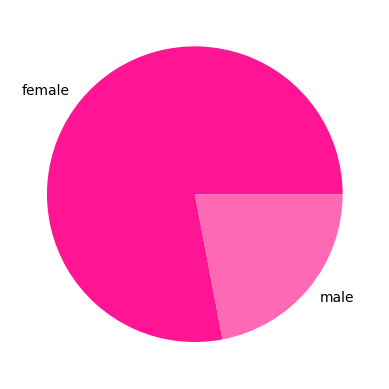

In [69]:
mylabels1 =  ['female','male']
mycolors1 = ['deeppink','hotpink']
plt.pie(alldata.groupby(['Sex'])['Survived'].mean(), labels = mylabels1, colors=mycolors1)

In [70]:
alldata.groupby(['Pclass'])['Survived'].mean() * 100

Pclass
1    67.826087
2    47.244094
3    23.437500
Name: Survived, dtype: float64

([<matplotlib.patches.Wedge at 0x7f7929097040>,
 [Text(0.03561606801937873, 1.099423255938694, '1'),
  Text(-0.5880156970483469, -0.9296437704974669, '2'),
  Text(0.9481952879998243, -0.5576071160009799, '3')])

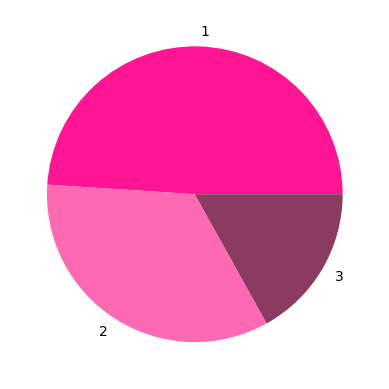

In [71]:
mylabels2 =  [1,2,3]
mycolors2 = ['deeppink','hotpink', '#8B3A62']
plt.pie(alldata.groupby(['Pclass'])['Survived'].mean(), labels = mylabels2, colors = mycolors2)

In [72]:
alldata.groupby(['Age Category'])['Survived'].mean() * 100

Age Category
adult     37.222222
child     48.648649
elder     37.209302
infant    57.142857
Name: Survived, dtype: float64

([<matplotlib.patches.Wedge at 0x7f7929066310>,
 [Text(0.8764595881154127, 0.6646943586345241, 'adult'),
  Text(-0.5981487132029939, 0.9231566047500298, 'child'),
  Text(-0.9649303723290344, -0.5281187144543841, 'elder'),
  Text(0.5979406558085496, -0.9232913798640393, 'infant')])

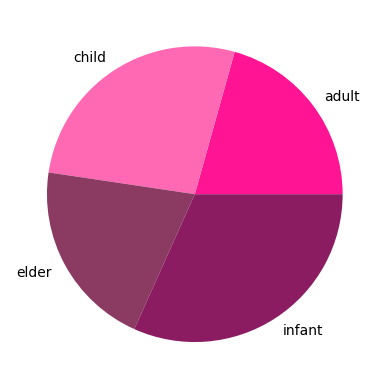

In [73]:
mylabels3 =  ['adult','child','elder','infant']
mycolors3 = ['deeppink','hotpink', '#8B3A62', '#8B1C62']
plt.pie(alldata.groupby(['Age Category'])['Survived'].mean(), labels = mylabels3, colors = mycolors3)

<font color = 'hotpink'> As we can see, "children and women first" rule applied to Sinking of the Titanic. Women have clearly bigger survivability rate, same goes to age categories which include minors. We can also notice how survivability rate for each class is significantly different, which may suggest higher class people had higher priority</font>

<font color = 'hotpink'> What if we intersected each of the 3 groups and saw which combination had the highest rate? </font>

In [74]:
alldata.groupby(['Sex','Pclass','Age Category'], group_keys=False)['Survived'].mean() * 100

Sex     Pclass  Age Category
female  1       adult           100.000000
                child           100.000000
                elder           100.000000
        2       adult            92.307692
                child           100.000000
                elder            50.000000
        3       adult            40.425532
                child            47.368421
                elder           100.000000
                infant           40.000000
male    1       adult            43.181818
                child           100.000000
                elder            26.666667
                infant          100.000000
        2       adult             7.272727
                child            60.000000
                elder            10.000000
                infant          100.000000
        3       adult            14.388489
                child            21.212121
                elder             0.000000
                infant           40.000000
Name: Survived, dtype: fl

<font color = 'hotpink'> The first thing we can see is that no matter the age group, all 1st class women have survived. </font>

<font color = 'hotpink'> The other groups with 100% survivability  rate are:
- 2nd class female children
- 3rd class female elders
- 1st class male children
- 1st class male infants
- 2nd class male infants
</font>

<font color = 'hotpink'> It may lead us to believe that being a kid nearly guaranteed you to survive the sinking. What if we lower the bar and check out which groups have at least 60% survivability rate?

In [76]:
alldata.groupby(['Sex','Pclass','Age Category'], group_keys=False)['Survived'].mean() * 100 >= 60

Sex     Pclass  Age Category
female  1       adult            True
                child            True
                elder            True
        2       adult            True
                child            True
                elder           False
        3       adult           False
                child           False
                elder            True
                infant          False
male    1       adult           False
                child            True
                elder           False
                infant           True
        2       adult           False
                child            True
                elder           False
                infant           True
        3       adult           False
                child           False
                elder           False
                infant          False
Name: Survived, dtype: bool

<font color = 'hotpink'> It didn't really add much. The only new groups meeting our requirements were 2nd class female adults and 2nd class male children. </font>